# SQL query and Data Analysis (Visualisation Sales data)

## Question 1 (60 pts): For Question 1, use the AVAX dataset, which contains two years of AVAX cryptocurrency price data. 

## Answer:

## Part 1: (15 pts) Plot open, high, low and close prices of AVAX using line plots in a single figure.

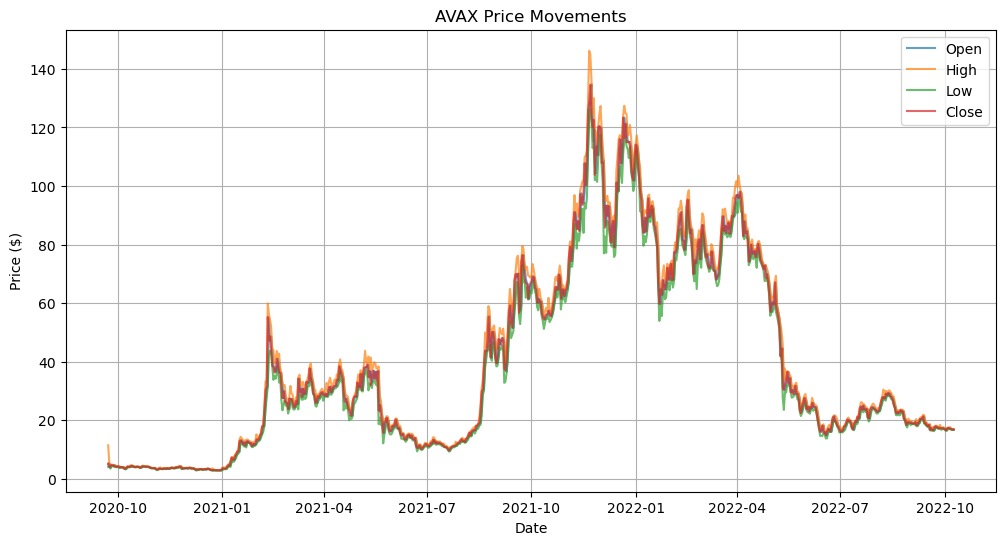

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
db_params = {
    "host": "db4free.net",
    "user": "wegebiro",
    "password": "wegebiro",
    "database": "wegebiro"
}

# Connect to MySQL and read data
conn = mysql.connector.connect(**db_params)
cursor = conn.cursor(dictionary=True)

query = "SELECT date, open, high, low, close, volume FROM avax"
cursor.execute(query)

# Fetch all rows and convert to DataFrame
df = pd.DataFrame(cursor.fetchall())

# Close connection
cursor.close()
conn.close()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Task (a): Plot open, high, low, and close prices
plt.figure(figsize=(12,6))
plt.plot(df.index, df['open'], label="Open", alpha=0.7)
plt.plot(df.index, df['high'], label="High", alpha=0.7)
plt.plot(df.index, df['low'], label="Low", alpha=0.7)
plt.plot(df.index, df['close'], label="Close", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.title("AVAX Price Movements")
plt.grid()
plt.show()

## Part 2:(15 pts) Find the dates of the highest and lowest prices.

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
db_params = {
    "host": "db4free.net",
    "user": "wegebiro",
    "password": "wegebiro",
    "database": "wegebiro"
}

# Connect to MySQL and read data
conn = mysql.connector.connect(**db_params)
cursor = conn.cursor(dictionary=True)

query = "SELECT date, open, high, low, close, volume FROM avax"
cursor.execute(query)

# Fetch all rows and convert to DataFrame
df = pd.DataFrame(cursor.fetchall())

# Close connection
cursor.close()
conn.close()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Task (b): Find highest and lowest price dates
highest_price_date = df['high'].idxmax()
lowest_price_date = df['low'].idxmin()
print(f"Highest price date: {highest_price_date}")
print(f"Lowest price date: {lowest_price_date}")

Highest price date: 2021-11-21 00:00:00
Lowest price date: 2020-12-31 00:00:00


## Part 3: (15 pts) How many days does AVAX have less than 20 000 000$ (20 million $) daily volume?

In [4]:
# Database connection details
db_params = {
    "host": "db4free.net",
    "user": "wegebiro",
    "password": "wegebiro",
    "database": "wegebiro"
}

# Connect to MySQL and read data
conn = mysql.connector.connect(**db_params)
cursor = conn.cursor(dictionary=True)

query = "SELECT date, open, high, low, close, volume FROM avax"
cursor.execute(query)

# Fetch all rows and convert to DataFrame
df = pd.DataFrame(cursor.fetchall())

# Close connection
cursor.close()
conn.close()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Task (c): Count days with volume < 20,000,000
low_volume_days = (df['volume'] < 20_000_000).sum()
print(f"Days with volume less than $20M: {low_volume_days}")

Days with volume less than $20M: 40


## Part 4: (15 pts) When does AVAX have largest difference between highest and lowest daily prices?

In [5]:
# Database connection details
db_params = {
    "host": "db4free.net",
    "user": "wegebiro",
    "password": "wegebiro",
    "database": "wegebiro"
}

# Connect to MySQL and read data
conn = mysql.connector.connect(**db_params)
cursor = conn.cursor(dictionary=True)

query = "SELECT date, open, high, low, close, volume FROM avax"
cursor.execute(query)

# Fetch all rows and convert to DataFrame
df = pd.DataFrame(cursor.fetchall())

# Close connection
cursor.close()
conn.close()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Task (d): Find the date with the largest high-low difference
df['daily_range'] = df['high'] - df['low']
largest_range_date = df['daily_range'].idxmax()
print(f"Date with the largest daily price difference: {largest_range_date}")

Date with the largest daily price difference: 2021-12-04 00:00:00


## Question 2 (30 pts): Using sales_analysis.xlsx dataset:

### Answer:

### Part 1: (10 pts) Create a line chart showing sales by calendar year

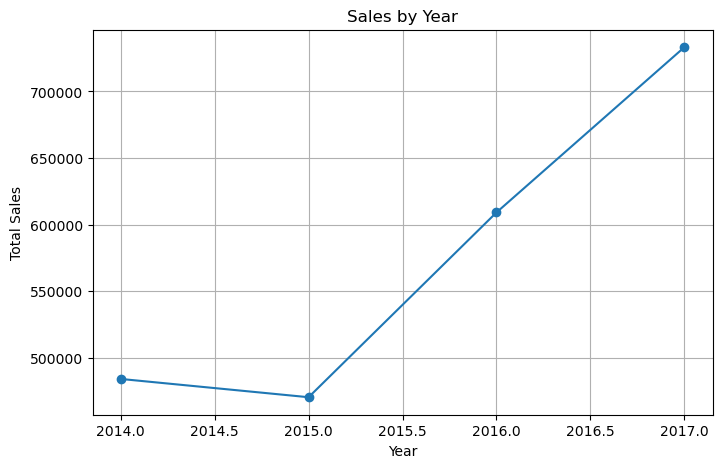

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data as a dictionary
file_path = "sales_analysis.xlsm"

# Read the sheet "Orders", making the first row as column names
data = pd.read_excel(file_path, sheet_name="Orders", header=0)

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Order Date' to datetime and extract year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# --- (a) Line chart: Sales by calendar year ---
sales_by_year = df.groupby("Year")["Sales"].sum()
plt.figure(figsize=(8, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales by Year")
plt.grid(True)
plt.show()

### Part 2: (10 pts) Find top 5 cities by sale

In [8]:
# Sample data as a dictionary
file_path = "sales_analysis.xlsm"

# Read the sheet "Orders", making the first row as column names
data = pd.read_excel(file_path, sheet_name="Orders", header=0)

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Order Date' to datetime and extract year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# --- (b) Find top 5 cities by sales ---
top_cities = df.groupby("City")["Sales"].sum().nlargest(5)
print("Top 5 Cities by Sales:\n", top_cities)

Top 5 Cities by Sales:
 City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64


### Part 3: (10 pts) Create a bar chart showing sales by category

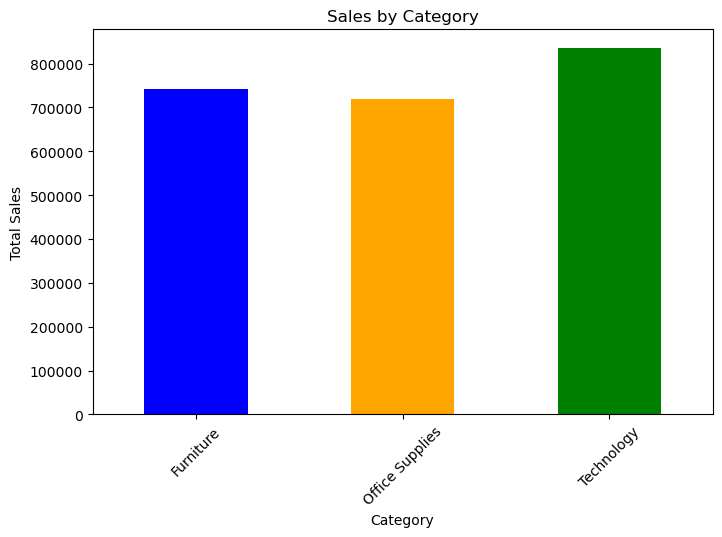

In [9]:
# Sample data as a dictionary
file_path = "sales_analysis.xlsm"

# Read the sheet "Orders", making the first row as column names
data = pd.read_excel(file_path, sheet_name="Orders", header=0)

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Order Date' to datetime and extract year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# --- (c) Bar chart: Sales by category ---
sales_by_category = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind="bar", color=['blue', 'orange', 'green'])
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()

## Question 3 (10 pts): Using IMDB-Movie-Data.csv dataset, generate below plot setting the correct x and y axes.

C:\Users\dmashirapov\AppData\Local\Temp\ipykernel_32516\808847751.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


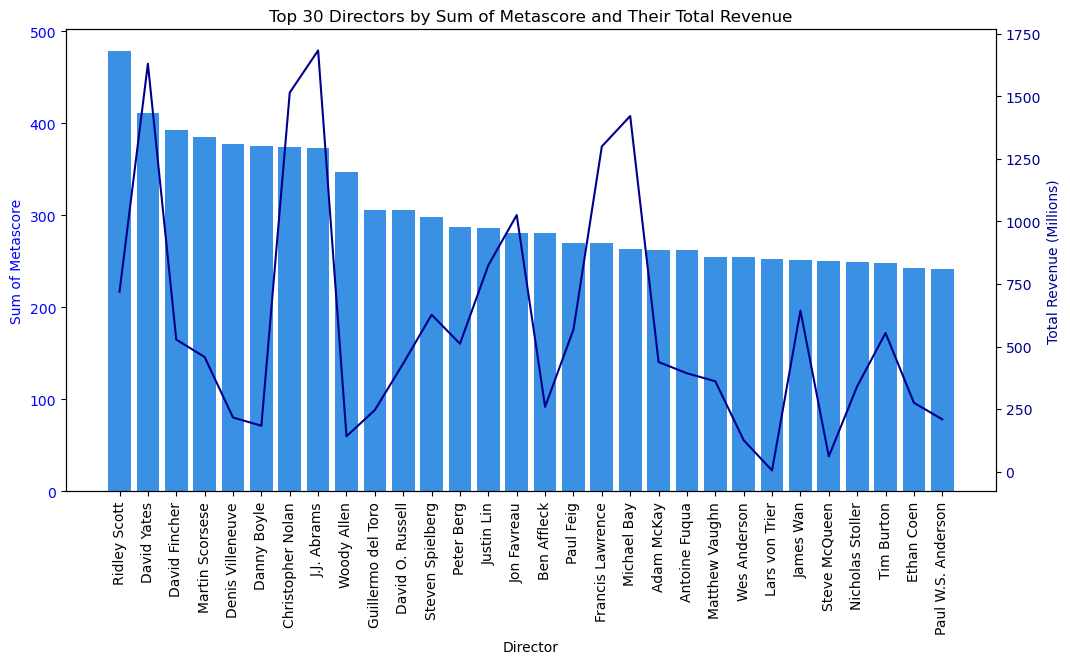

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)

# Remove rows with missing Metascore
df = df.dropna(subset=["Metascore"])

# Group by director and calculate the sum of Metascore and total revenue
director_stats = df.groupby("Director").agg({"Metascore": "sum", "Revenue (Millions)": "sum"}).reset_index()

# Sort by sum of Metascore (descending order)
director_stats = director_stats.sort_values(by="Metascore", ascending=False).head(30)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (Sum of Metascore)
sns.barplot(x="Director", y="Metascore", data=director_stats, color="dodgerblue", ax=ax1)
ax1.set_ylabel("Sum of Metascore", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Line plot (Total Revenue)
ax2 = ax1.twinx()
sns.lineplot(x="Director", y="Revenue (Millions)", data=director_stats, color="darkblue", ax=ax2)
ax2.set_ylabel("Total Revenue (Millions)", color="darkblue")
ax2.tick_params(axis="y", labelcolor="darkblue")

plt.title("Top 30 Directors by Sum of Metascore and Their Total Revenue")
plt.show()